<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import datasets

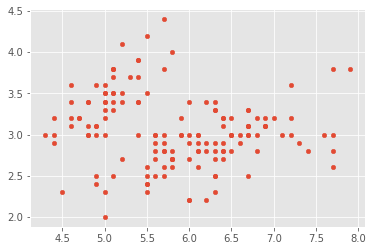

In [10]:
#loading the data
iris = datasets.load_iris()
X = iris.data

K=3

##choosing K random points to be centroids for start: 
centroids_i=np.random.choice(len(X),K,replace=False)
centroids_val=X[centroids_i] 

In [11]:
def cluster_data(data,centroids):
    clustered_data={}
    dist=[]
    for i in range(len(data)):
        for j in range(K):
            dist.append(np.linalg.norm(data[i]-centroids[j]))
        clustered_data.setdefault(dist.index(min(dist)), []).append(data[i])
        dist=[]
    return clustered_data

In [12]:
def new_centroids(clustered_data):
    new_centers=[]
    for i in range(len(clustered_data)):
        new_centers.append(sum(clustered_data.get(i))/len(clustered_data.get(i)))
    return new_centers

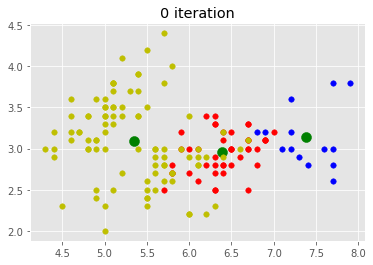

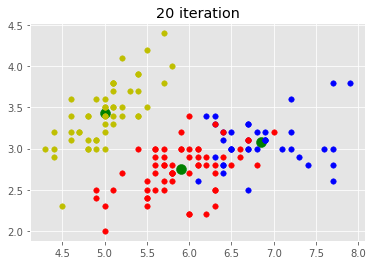

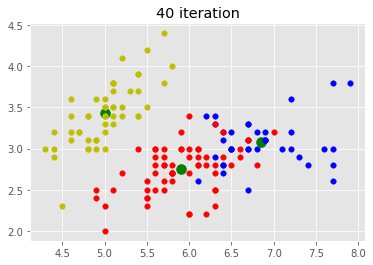

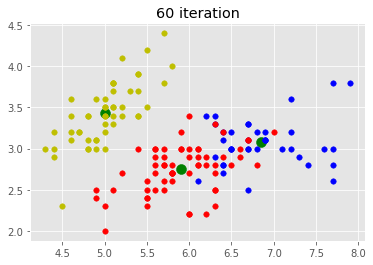

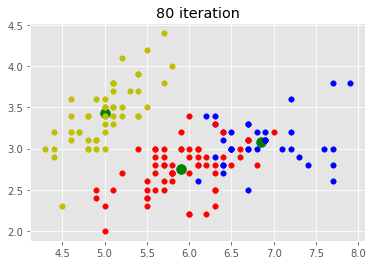

In [26]:
centers=centroids_val 
colors=['b','r','y'] 

for i in range(100):
    data_class=cluster_data(X,centers)
    centers=new_centroids(data_class)
    cent=np.asarray(centers)
    if i%20==0:
      plt.scatter(cent[:,0],cent[:,1],c='g',s=100)
      for j in range(K):
          dataplot=np.asarray(data_class.get(j))
          dataplot=dataplot[:,:2]
          plt.scatter(dataplot[:,0],dataplot[:,1],c=colors[j], s=30)
      plt.title(str(i) + " iteration")
      plt.show()

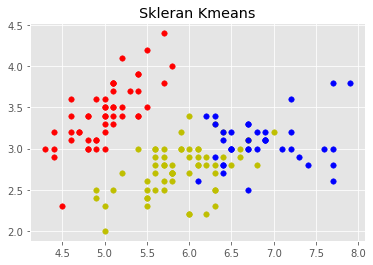

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(X)

for i in range(len(kmeans)):
    for j in range(len(np.unique(kmeans))):
        if kmeans[i]==np.unique(kmeans)[j]:
           plt.scatter(X[i,0],X[i,1],c=colors[j], s=30)

plt.title('Skleran Kmeans')           
plt.show()